
**You need to past this to terminal to get access token** 

```
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=9090 --no-browser
```



In [0]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

import numpy as np
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from modules.matrices import *
from modules.loss_functions import *

In [0]:
def mse2(X, Y):
  Y2 = Y
  real_J = (Y2[-1, 0] + Y2[-1, 1])/2 
  Y2[-1, 0] = real_J
  Y2[-1, 1] = real_J
  return(mse(X, Y2))

In [0]:
# Main function
def construct(N_iterations, d_max_iter, g_max_iter, beta, ising=False):
    param_num = 2 if ising else 4
    TD = []
    MSE = []
    params = []
    
    # initiate coefs (couplings and fields) and angles 
    params_g = np.random.uniform(-1, 1, (param_num, N_spins))
    rho_g = density_matr(params_g, beta, ising)
    angles = np.zeros((2, N_spins))
    
    MSE.append(mse2(params_t, params_g))
    TD.append(g_loss_func(params_g, rho_t, angles, beta, ising))
    i = 1
    for _ in range(N_iterations):
      if MSE[-1] < 10 ** -5:
        print("10^-5 MSE threshold was achieved")
        break
        
      # Find most suitable coefs
      result_g = minimize(g_loss_func,
                        args=(rho_t, angles, beta, ising),
                        x0=params_g.reshape(param_num*N_spins),
                        method='Nelder-Mead',
                        options={'maxiter':g_max_iter})
      params_g = np.array(result_g.x).reshape(param_num, N_spins)
      rho_g = density_matr(params_g, beta, ising)
      params.append(params_g)
      # Keep track of errors change
      TD.append(result_g.fun)
      MSE.append(mse2(params_t, params_g))
      # Find basis
      result_d = minimize(d_loss_func,
                        args=(rho_g, rho_t),
                        x0=angles.reshape(2*N_spins),
                        method='Nelder-Mead',
                        options={'maxiter':d_max_iter}).x
      angles = result_d.reshape(2, N_spins)
      print(str(i) + "/" + str(N_iterations))
      i += 1
    return MSE, TD, params, angles

In [0]:
# Plot function
def double_plot(MSE, TD):
  X = range(len(MSE))
  fig, ax1 = plt.subplots()


  color = 'tab:red'
  ax1.set_xlabel('iterations')
  ax1.set_ylabel(f'MSE', color=color)
  ax1.scatter(X, MSE, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(f'TD', color=color)  # we've already handled the x-label with ax1
  ax2.scatter(X, TD, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()

In [7]:
# Target hamiltonian we need to restore
beta = 0.3
N_spins = 2
ising = False
param_num = 2 if ising else 4

# params_t = np.array([[0,0,0],
#             [0,0,0],
#             [1,1,1],
#             [1,1,1],
#             [1,1,1]])
params_t = np.array([[-0.5, 0.3],
                     [1, -0.7],
                     [-0.4, 0.5],
                     [-1, -1]])

rho_t = density_matr(params_t, beta, ising)
rho_t

array([[ 0.36353255-7.78437421e-19j, -0.02164782-5.05115739e-02j,
         0.02858829+5.71765829e-02j,  0.01256715-1.48520858e-02j],
       [-0.02164782+5.05115739e-02j,  0.15629547+2.01793634e-20j,
        -0.01313802+7.72824556e-04j,  0.03668618+7.33723612e-02j],
       [ 0.02858829-5.71765829e-02j, -0.01313802-7.72824556e-04j,
         0.09337282-6.70708222e-19j, -0.01816005-4.23734399e-02j],
       [ 0.01256715+1.48520858e-02j,  0.03668618-7.33723612e-02j,
        -0.01816005+4.23734399e-02j,  0.38679916+1.42896628e-18j]])

1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50


/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z
/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)


12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50


/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z
/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)


23/50


/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z
/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)


24/50


/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z
/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)


25/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


26/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


27/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


28/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


29/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


30/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


31/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


32/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


33/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


34/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


35/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


36/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


37/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


38/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


39/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


40/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


41/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


42/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


43/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


44/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


45/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


46/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


47/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


48/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


49/50


/home/koritskiy/anaconda3/envs/hamiltonian_learning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1641: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:65: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z


50/50
CPU times: user 1min 43s, sys: 52 ms, total: 1min 43s
Wall time: 1min 43s


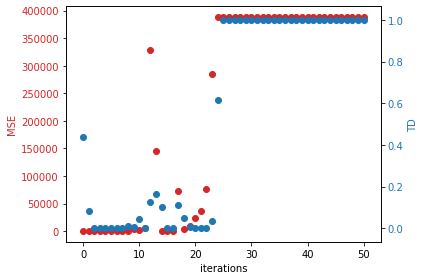

In [12]:
# Run 
%%time
np.random.seed(42)
N_iterations = 50
MSE, TD, params, angles = construct(N_iterations,
                                    d_max_iter=1000,
                                    g_max_iter=1000,
                                    beta = 0.3,
                                    ising=ising)
double_plot(MSE, TD)

In [14]:
MSE

[0.5898811048985482,
 3.8614785597610912,
 2.133231027597814,
 0.20419500228887727,
 0.32531224563711497,
 0.1032892639264096,
 3.0983311236842694,
 14.305467195921036,
 84.36151872758342,
 3357.576753013206,
 2151.993799314701,
 5919.136195562378,
 327862.93331948965,
 145512.64510427785,
 20.458982381380626,
 19.74844278680475,
 628.1116076971284,
 73560.1399597563,
 3847.0200145001595,
 8455.825034087673,
 24357.57053882678,
 37104.97007285666,
 77217.73763979664,
 284263.0904186673,
 388257.5837728082,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.6007076425,
 388257.

In [13]:
TD

[0.44044030011437885,
 0.08409706384147962,
 3.3395483431397643e-07,
 2.9554748556814836e-07,
 4.225084361209053e-06,
 2.9380951614699224e-06,
 1.116587052818474e-07,
 6.385644501946675e-05,
 0.012955192355924183,
 0.007466690911007989,
 0.04272058282570426,
 4.6073229592602516e-08,
 0.12671005579509098,
 0.16570687586046284,
 0.1032862894585592,
 1.3407025067913025e-06,
 2.8081761221931956e-08,
 0.11253446968061112,
 0.050912991488584816,
 0.0074530421922910095,
 5.89435848741271e-09,
 1.5020308885560496e-08,
 1.9618674573784745e-08,
 0.034184025891887154,
 0.6152862982567127,
 1.0000000328631684,
 1.0000000380465928,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396718,
 1.0000000452396

In [79]:
density_matr(params_t, beta, ising)

array([[ 0.33907056+0.j, -0.01514748+0.j,  0.03807553+0.j,
        -0.00351874+0.j],
       [-0.01514748+0.j,  0.0683194 +0.j, -0.0023766 +0.j,
         0.02812685+0.j],
       [ 0.03807553+0.j, -0.0023766 +0.j,  0.1874537 +0.j,
        -0.02533918+0.j],
       [-0.00351874+0.j,  0.02812685+0.j, -0.02533918+0.j,
         0.40515635+0.j]])

In [80]:
density_matr(params[-1], beta, ising)

array([[ 0.33944325+0.j, -0.01517254+0.j,  0.04639882+0.j,
        -0.00429492+0.j],
       [-0.01517254+0.j,  0.06850353+0.j, -0.00289641+0.j,
         0.03431206+0.j],
       [ 0.04639882+0.j, -0.00289641+0.j,  0.18691626+0.j,
        -0.02531361+0.j],
       [-0.00429492+0.j,  0.03431206+0.j, -0.02531361+0.j,
         0.40513695+0.j]])

In [83]:
params_t

array([[-0.5,  0.3],
       [ 1. , -0.7],
       [-1. , -1. ]])

In [84]:
params[-1]

array([[-0.61201597,  0.30015139],
       [ 0.99893858, -0.69874166],
       [-1.00470152, -1.00470152]])

In [0]:
d_max_iters = [i for i in range(100, 2000, 100)]

In [0]:
MSEs = []
TDs = []
paramss = []
for d_iter in d_max_iters:
  np.random.seed(43)
  N_iterations = 20
  MSE, TD, params, angles = construct(N_iterations,
                                    d_max_iter=d_iter,
                                    g_max_iter=2000-d_iter,
                                    beta = 0.3,
                                    ising=ising)
  MSEs.append(MSE)
  TDs.append(TD)
  paramss.appdend(params)
  double_plot(MSE, TD)

1/20
2/20
3/20


/home/koritskiy/rqc/hamiltonian_learning/modules/matrices.py:67: RuntimeWarning: invalid value encountered in true_divide
  rho = sp.linalg.expm(-beta * H) / Z
